# Integrated Project 1

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

### Step 1. Open the data file and study the general information

In [1]:
import pandas as pd

games = pd.read_csv('/datasets/games.csv')

In [2]:
games.info()
games.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


We can see  that the dataset contains informations about games like the name of the games, the platforms where the games are found, the year of release, genre,values for revenues in different regions, the reviews from professionals and users and the rating for every game. But we can also notice that some data is lacking so we will start with analising and trying to fill in those rows before moving on. 

### Step 2. Prepare the data

Replace the column names (make them lowercase).

In [3]:
games.columns = games.columns.str.lower()
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Convert the data to the required types.

In [4]:
display(games.isnull().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [5]:
med_release = games['year_of_release'].median()
games['year_of_release'] = games['year_of_release'].fillna(med_release)
games.loc[games['user_score']=='tbd','user_score']='0'
games['user_score'] = games['user_score'].fillna(0)

games['user_score']=games.user_score.astype('float64')
games['year_of_release']=games.year_of_release.astype('int')
games['critic_score']=games['critic_score'].fillna(0)
games['critic_score'].value_counts()

games.loc[games['user_score']==0,'rating']="E"
games.loc[games['critic_score']==0,'rating']="E"

games.isnull().sum()


name                2
platform            0
year_of_release     0
genre               2
na_sales            0
eu_sales            0
jp_sales            0
other_sales         0
critic_score        0
user_score          0
rating             70
dtype: int64

We filled the missing values from the column 'year_of_release' with the median just because we couldn't find a connection with any data from other columns and since there are not too many missing values, I wanted to 'blend' them with the rest. We also changed the data type to 'int' as it makes much sens for a year to be represented like this.
For the 'user_score' column we can observe that there is a huge number of missing values and since there is no obvious connection with other data we also filled with zeroes just to be able to work more easily with that column.
As we have just float numbers now, we changed the datatype to float.
Same for the critic_score column.
We only filled with "E" the missing values in the rating column for those where the user_score and critic_score are 0 ( also missing values) . 

In [6]:
games.isnull().sum()

name                2
platform            0
year_of_release     0
genre               2
na_sales            0
eu_sales            0
jp_sales            0
other_sales         0
critic_score        0
user_score          0
rating             70
dtype: int64

Calculate the total sales.

In [7]:
games['total_sales'] = games['na_sales'] +games['eu_sales']+ games['jp_sales'] +games['other_sales']
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,E,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,E,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,E,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,E,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,E,0.01


Now we processed the missing values, we know to interpretate zeroes as missing values, we have the right data types and we calculate the total sales for every game. This will help us when it comes to analyse the data.

### Step 3. Analyze the data

In [8]:
#Look at how many games were released in different years. Is the data for every period significant?
games.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1466
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

increase gradually till 2001; 
peak: 2002-2011; 
year>2012 :dramatically drop followed by consistancy

7.0 years


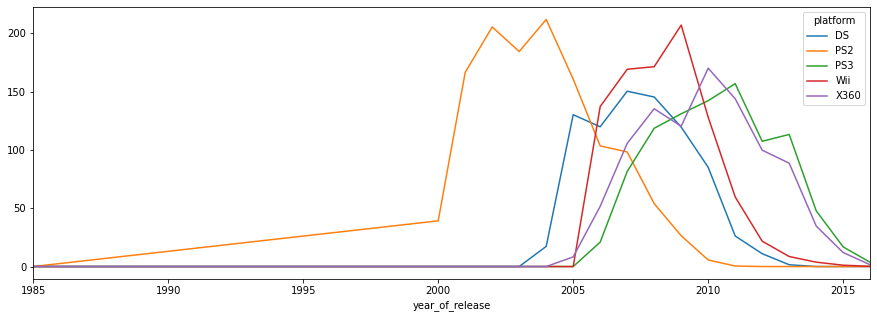

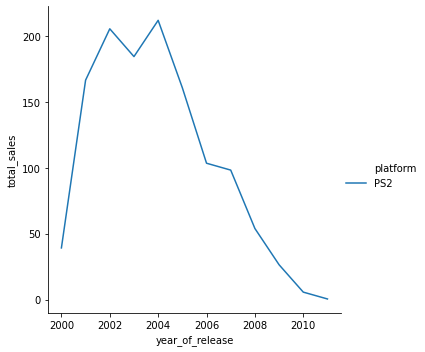

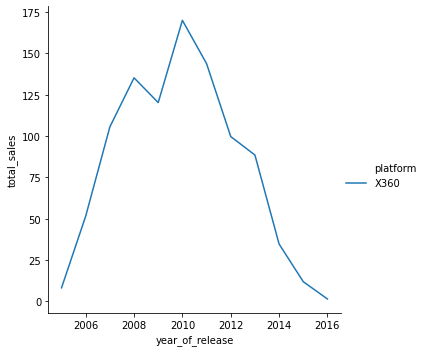

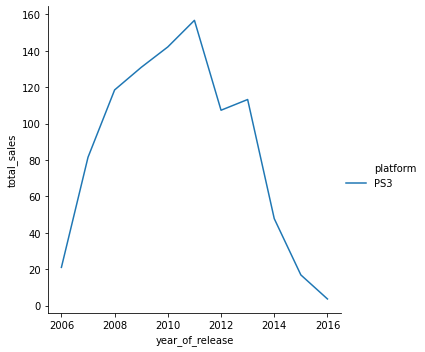

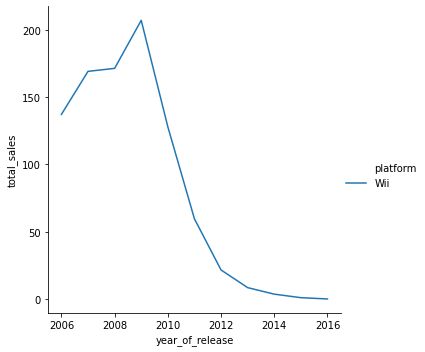

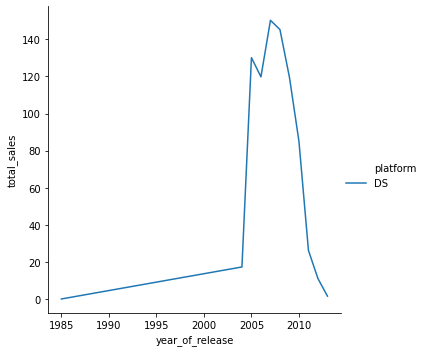

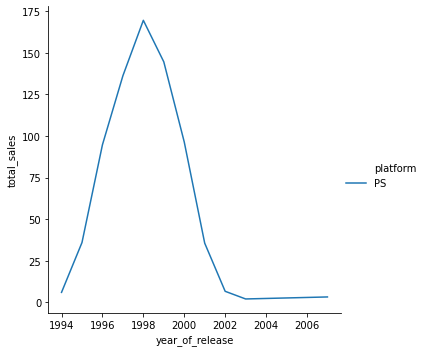

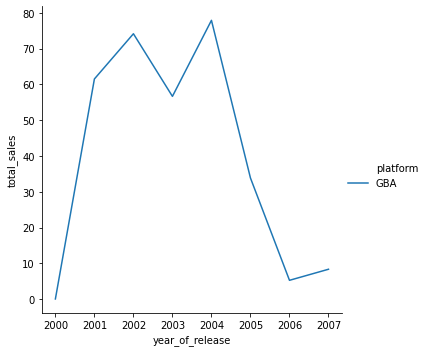

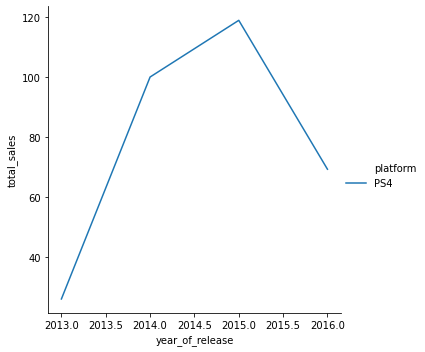

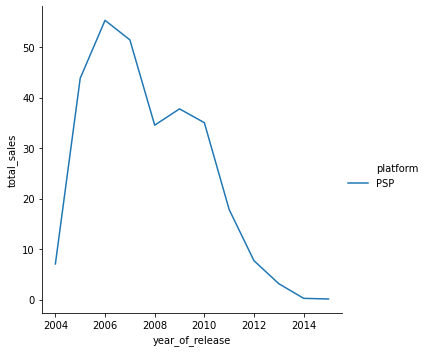

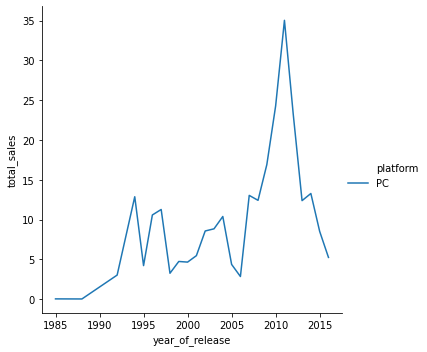

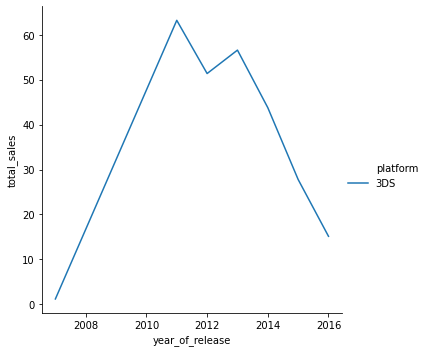

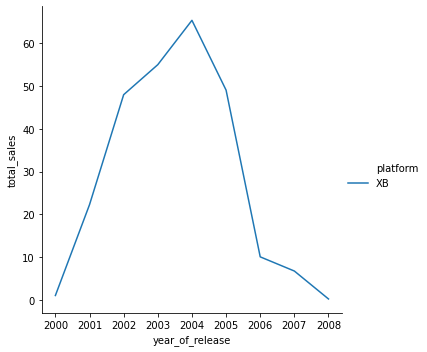

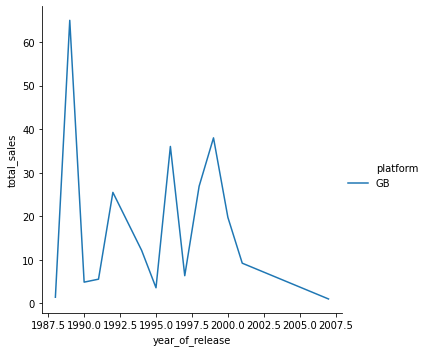

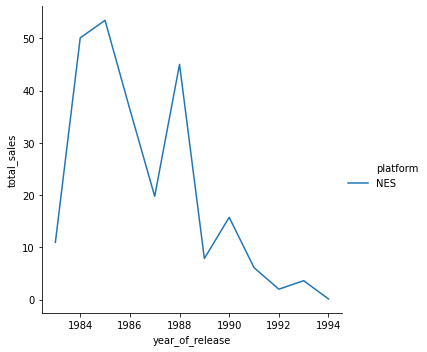

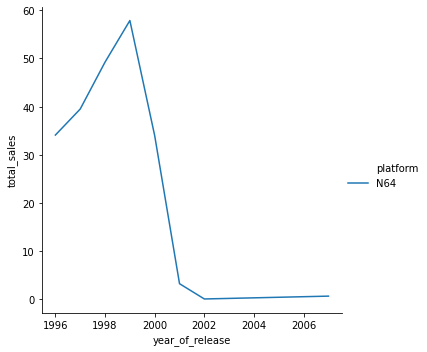

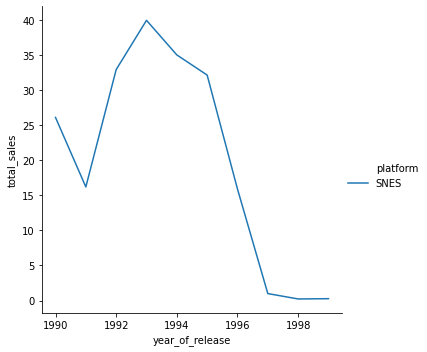

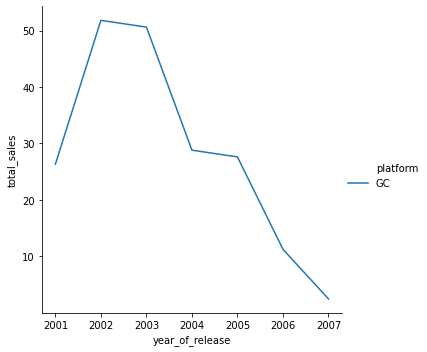

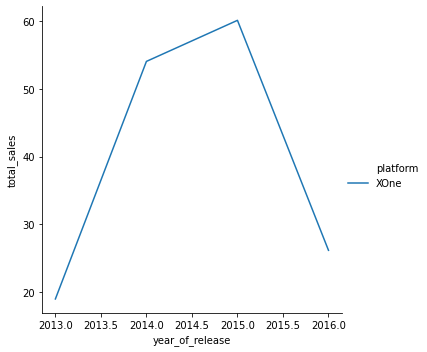

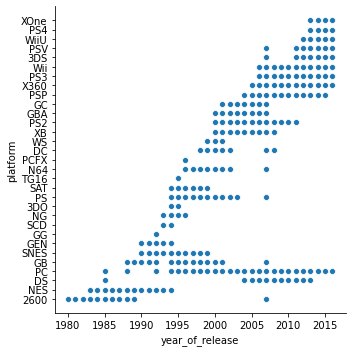

In [9]:
#Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sales_by_platform=games.groupby('platform')['total_sales']
sales_by_platform.sum()
greatest_sales=sales_by_platform.sum().sort_values( ascending= True)
games_filter = games.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index().sort_values(by='year_of_release')

games_filtered=games[games['platform'].isin(['DS','Wii','PS3','X360','PS2'])]
games_filtered.pivot_table(values="total_sales", index="year_of_release", columns="platform", aggfunc="sum").fillna(0).plot(figsize=(15,5));
sns.relplot(x="year_of_release", y="total_sales",hue="platform", kind="line", data=games_filter.query('platform=="PS2"'));
sns.relplot(x="year_of_release", y="total_sales",hue="platform", kind="line", data=games_filter.query('platform=="X360"'));
sns.relplot(x="year_of_release", y="total_sales",hue="platform", kind="line", data=games_filter.query('platform=="PS3"'));
sns.relplot(x="year_of_release", y="total_sales",hue="platform", kind="line", data=games_filter.query('platform=="Wii"'));
sns.relplot(x="year_of_release", y="total_sales",hue="platform", kind="line", data=games_filter.query('platform=="DS"'));
sns.relplot(x="year_of_release", y="total_sales",hue="platform", kind="line", data=games_filter.query('platform=="PS"'));
sns.relplot(x="year_of_release", y="total_sales",hue="platform", kind="line", data=games_filter.query('platform=="GBA"'));
sns.relplot(x="year_of_release", y="total_sales",hue="platform", kind="line", data=games_filter.query('platform=="PS4"'));
sns.relplot(x="year_of_release", y="total_sales",hue="platform", kind="line", data=games_filter.query('platform=="PSP"'));
sns.relplot(x="year_of_release", y="total_sales",hue="platform", kind="line", data=games_filter.query('platform=="PC"'));
sns.relplot(x="year_of_release", y="total_sales",hue="platform", kind="line", data=games_filter.query('platform=="3DS"'));
sns.relplot(x="year_of_release", y="total_sales",hue="platform", kind="line", data=games_filter.query('platform=="XB"'));
sns.relplot(x="year_of_release", y="total_sales",hue="platform", kind="line", data=games_filter.query('platform=="GB"'));
sns.relplot(x="year_of_release", y="total_sales",hue="platform", kind="line", data=games_filter.query('platform=="NES"'));
sns.relplot(x="year_of_release", y="total_sales",hue="platform", kind="line", data=games_filter.query('platform=="N64"'));
sns.relplot(x="year_of_release", y="total_sales",hue="platform", kind="line", data=games_filter.query('platform=="SNES"'));
sns.relplot(x="year_of_release", y="total_sales",hue="platform", kind="line", data=games_filter.query('platform=="GC"'));
sns.relplot(x="year_of_release", y="total_sales",hue="platform", kind="line", data=games_filter.query('platform=="XOne"'));

sns.relplot(x="year_of_release", y="platform", data=games_filter);
print(games.groupby(['platform','year_of_release'])['platform'].unique().value_counts().median(), 'years')

 popular but now 0 values (TOTAL_SALES_PEAK > 100): PS2,Wii,DS,PS;
 one or 2 years difference between new platforms;
 it takes on average 7 years to fade;

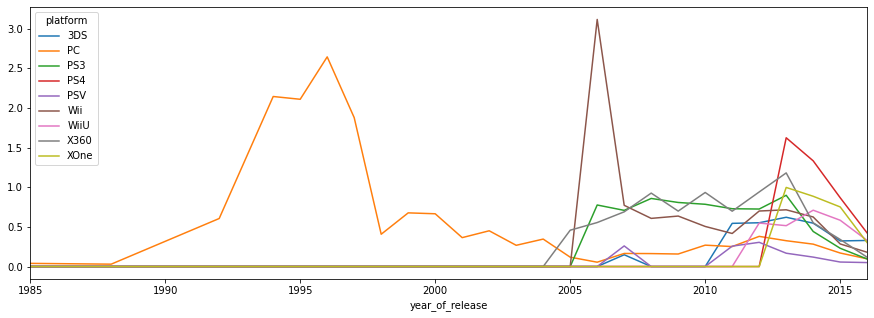

In [10]:
#Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
games.query('year_of_release==2016').pivot_table(values="total_sales", index="platform",columns='year_of_release', aggfunc="sum")
potential_profitable=games[games['platform'].isin(['3DS','PC','PS3','PS4','PSV','Wii','WiiU','X360','XOne'])]
potential_profitable.pivot_table(values="total_sales", index="year_of_release", columns="platform",aggfunc="mean").fillna(0).plot(figsize=(15,5));


leading in sales :XOne,PS4,3DS;
potentially profitable :PS4,XOne, 3DS (PC-CONSISTANCY).

platform
3DS     0.547000
PC      0.282553
PS3     0.442222
PS4     1.333333
PSP     0.024000
PSV     0.119000
Wii     0.625000
WiiU    0.710645
X360    0.551429
XOne    0.886393
Name: total_sales, dtype: float64

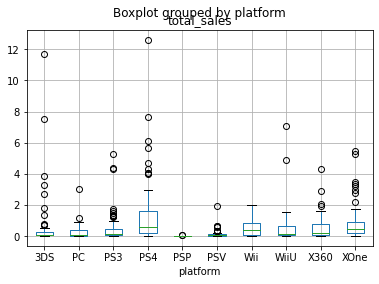

In [11]:
#Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
import matplotlib.pyplot as plt

games.query('year_of_release==2014').boxplot(column='total_sales',by='platform');
games.query('year_of_release==2014').groupby('platform')['total_sales'].mean()

boxplot : no big difference in sales(all <2 with few outliers) , the average sales are very small and similar for all platforms.

'It will be better to use data since 2014. Could you please explain why?'
Platforms from 2014 are more likely to still be active since this is only a 2 years difference and the average lifetime of a platform is 7 years. The number of games released in this period is almost the same with the last year and chosing platforms from 2014 also means less sales which lead to better assumptions.

user score 0.11311562450852881
critic score 0.22754960627752652


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:3

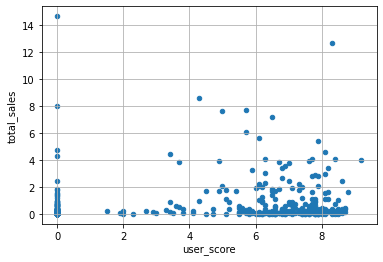

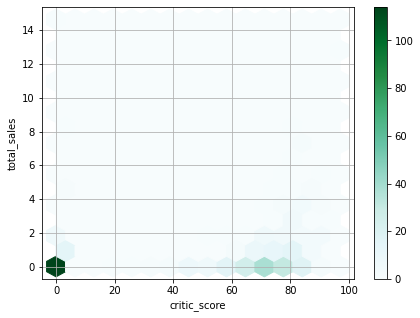

In [12]:
#Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
#PS4
def games_reviews(a):
    games.query(a).plot(x='user_score', y='total_sales',  kind='scatter', grid=True);
    games.query(a).plot(x='critic_score', y='total_sales',  kind='hexbin', gridsize=15, figsize=(7, 5), sharex=False, grid=True); 
    print('user score',games.query(a)['user_score'].corr(games['total_sales']))
    print('critic score',games.query(a)['critic_score'].corr(games['total_sales']))

games_reviews('platform=="PS4"')

user_score<1 and critic_score <1 which means that there is a weak relationship between scores and sales.

user score 0.11656261405851895
critic score 0.2748391874944539
user score 0.14968693732008523
critic score 0.1672385348032063
user score 0.008840055630624802
critic score 0.07973661320683437
user score 0.18613675964673176
critic score 0.18949784397390257
user score 0.27402545981226195
critic score 0.3550656759848728


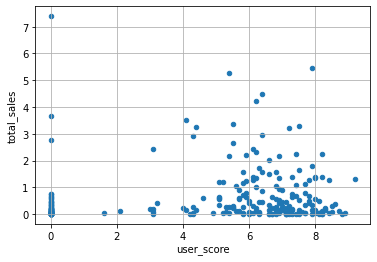

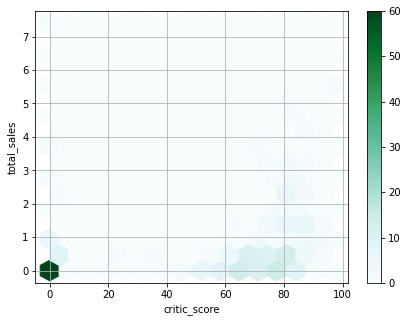

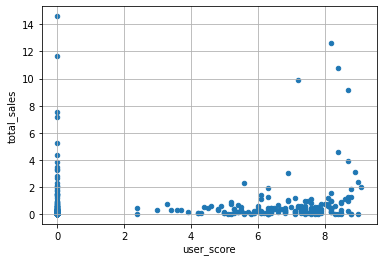

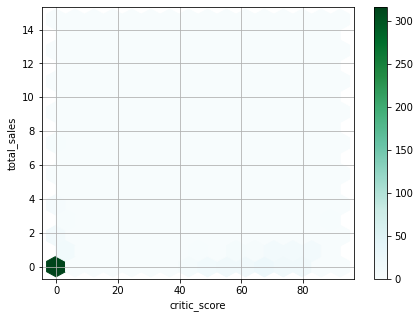

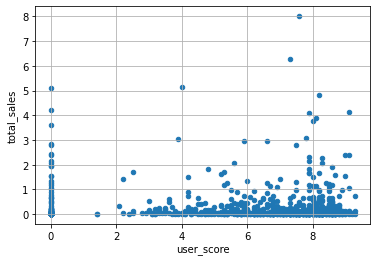

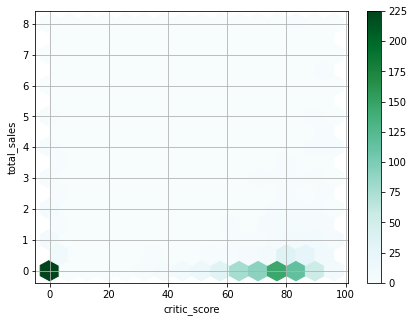

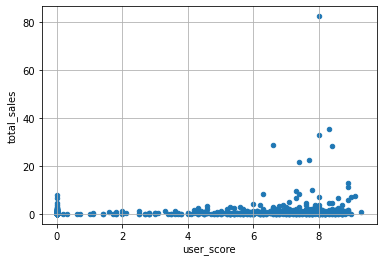

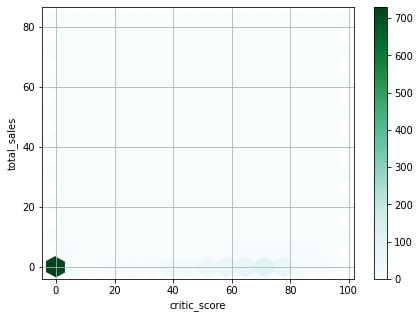

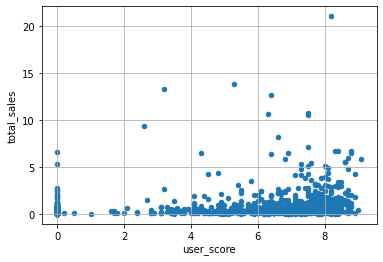

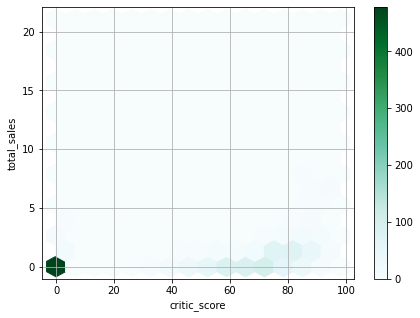

In [13]:
#Keeping your conclusions in mind, compare the sales of the same games on other platforms.
games_reviews('platform=="XOne"')
games_reviews('platform=="3DS"')
games_reviews('platform=="PC"')
games_reviews('platform=="Wii"')
games_reviews('platform=="PS3"')


same goes  for the rest of the platforms(weak relationship) so we can take it as a general conclusion

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: total_sales, dtype: float64

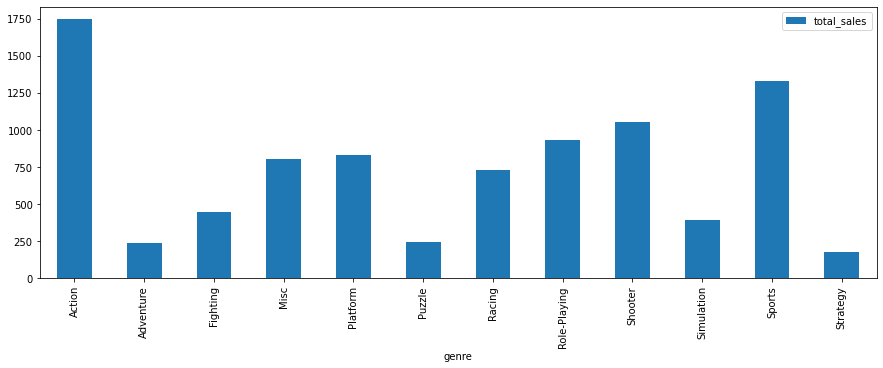

In [14]:
#Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?
display(games.groupby('genre')['total_sales'].sum().sort_values(ascending=False))
games.pivot_table(values='total_sales', index='genre', aggfunc='sum').plot(kind='bar',figsize=(15,5));

considering >500 profitable genres : genres have am impact on sales (big difference between highest and lowest genre's sales)

On this step we tried to find the connection between the games and the rest of the columns and what has an impact on sales. We found out that there is a connection for the number of games released in different years. We saw that the number of games released in the period 2002-2011 incresed dramatically .
We also found out that new platforms are released every year or every two years, and usually the lifetime of a platform is on average 7 years .
The popular platforms that now have zero sales are PS2,Wii,DS,PS and the most potentially profitable ones are PS4,XOne, 3DS.
As the popularity of a platform changes and the sales are different from year to year we don't have a platform better the other when it comes to average sales.
We also can not say that user score or professional review has an impact on sales nut. 
We can not say the same about the genre. We found out that Action, Sports, Shooter, Role-Playing, Platform and Misc have way bigger values for sales than the rest of the genres.
So after all this findings, we can say that when it comes to total sales we could focus on PS4,XOne and 3DS platforms and the genres Action, Sports, Shooter, Role-Playing, Platform and Misc.

### Step 4. Create a user profile for each region

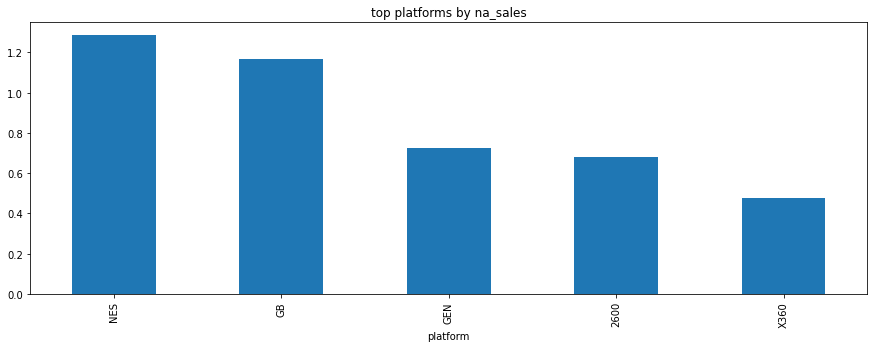

In [15]:
#For each region (NA, EU, JP), determine:
#The top five platforms. Describe variations in their market shares from region to region.
na_platform =games.groupby('platform')['na_sales'].mean().sort_values(ascending=False).head()
na_platform.plot(title='top platforms by na_sales',x='platform',y='na_sales',kind='bar',figsize=(15,5));

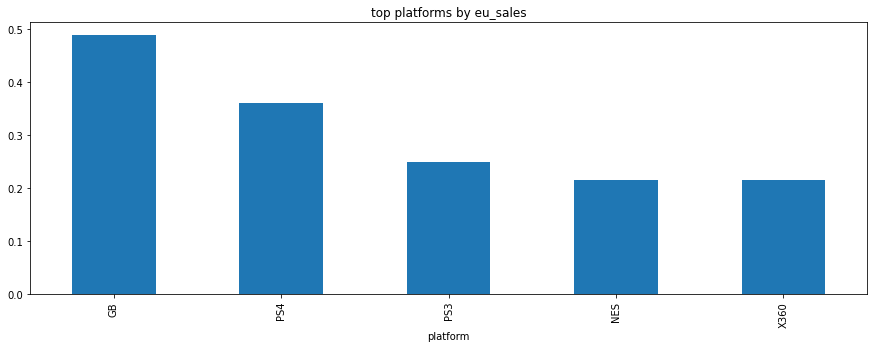

In [16]:
eu_platform =games.groupby('platform')['eu_sales'].mean().sort_values(ascending=False).head()
eu_platform.plot(title='top platforms by eu_sales',x='platform',y='eu_sales',kind='bar',figsize=(15,5));

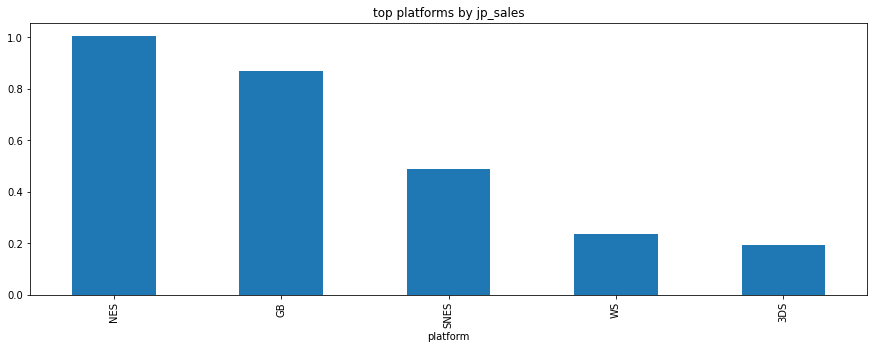

In [17]:
jp_platform =games.groupby('platform')['jp_sales'].mean().sort_values(ascending=False).head()
jp_platform.plot(title='top platforms by jp_sales',x='platform',y='jp_sales',kind='bar',figsize=(15,5));

The platfom sales for every region is not so different. We can see that two platforms are found in these three regions and those platforms are NES and GB. And we also have X360 in top for two of the regions. So, even though the top five is not identical for every region,we have two platforms found in all of the region and we can make a general conclusion about them. 

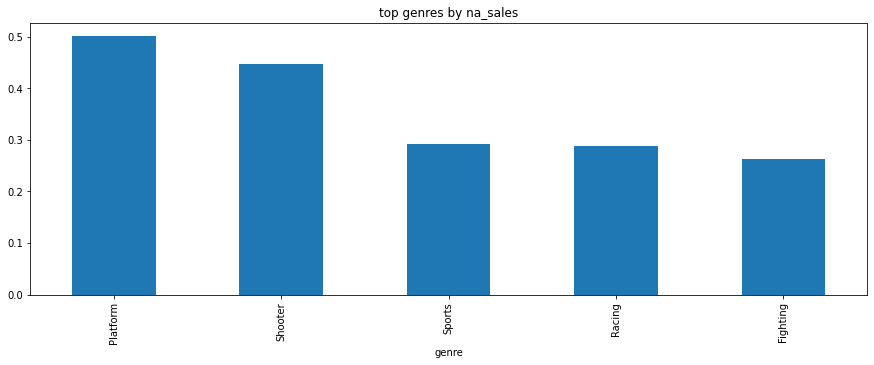

In [18]:
#The top five genres. Explain the difference.
genres_na = games.groupby('genre')['na_sales'].mean().sort_values(ascending=False).head()
genres_na.plot(title='top genres by na_sales',x='genre',y='na_sales',kind='bar',figsize=(15,5));

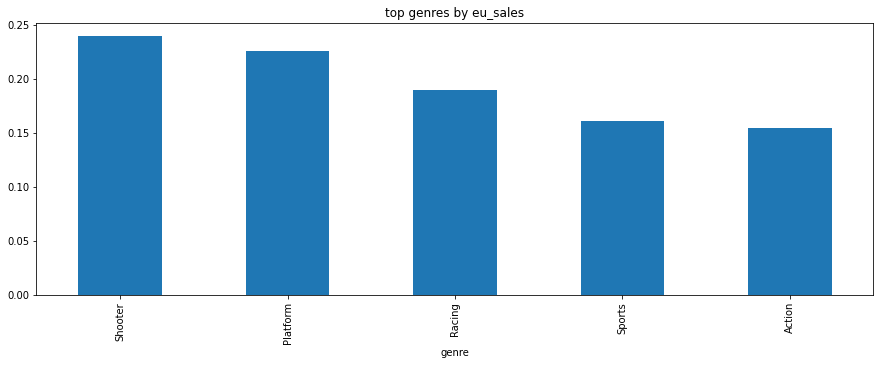

In [19]:
genres_eu = games.groupby('genre')['eu_sales'].mean().sort_values(ascending=False).head()
genres_eu.plot(title='top genres by eu_sales',x='genre',y='eu_sales',kind='bar',figsize=(15,5));

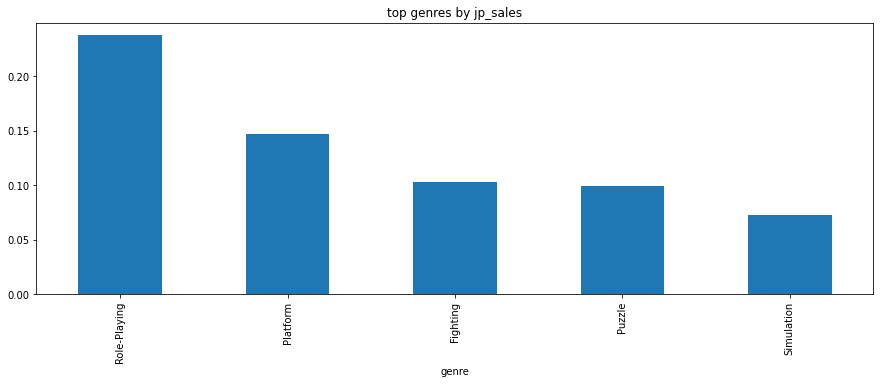

In [20]:
genres_jp = games.groupby('genre')['jp_sales'].mean().sort_values(ascending=False).head()
genres_jp.plot(title='top genres by jp_sales',x='genre',y='jp_sales',kind='bar',figsize=(15,5));

Here comes more similarity for North American and European region. Four out of five makes a very clear statement: this two regions are very similar when it comes to choosing the genre. We can not say the same about the other region. It has really different sales, just one platform can be found in the other two regions. So sales can't be affected by the genre when we look only at the North American and European region but the sales from Japan can definitly affect our sales.

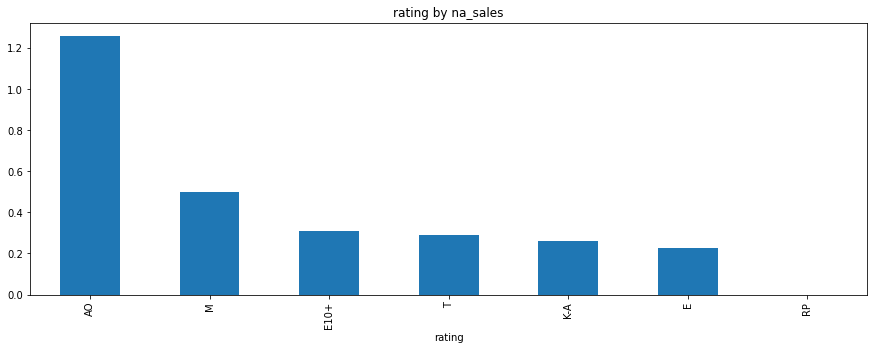

In [21]:
#Do ESRB ratings affect sales in individual regions?
rating_na = games.groupby(['rating'])['na_sales'].mean().sort_values(ascending=False)
rating_na.plot(title='rating by na_sales',x='rating',y='na_sales',kind='bar',figsize=(15,5));

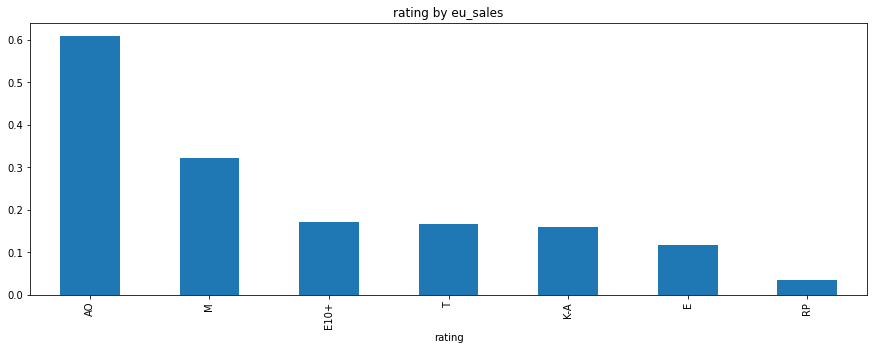

In [22]:
rating_eu = games.groupby(['rating'])['eu_sales'].mean().sort_values(ascending=False)
rating_eu.plot(title='rating by eu_sales',x='rating',y='eu_sales',kind='bar',figsize=(15,5));

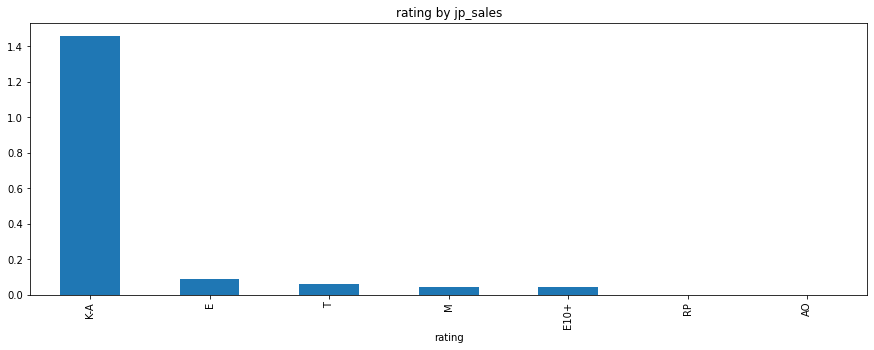

In [23]:
rating_jp = games.groupby(['rating'])['jp_sales'].mean().sort_values(ascending=False)
rating_jp.plot(title='rating by jp_sales',x='rating',y='jp_sales',kind='bar',figsize=(15,5));

Rating can definitly affect the sales in different regions. As we see in the North American and European region, AO and M ratings have a lot more sales than the rest of the ratings. In the Japanese region it is also an obvious difference, even more obvious than the previous ones. The K-A rating has the most sales.

As a conclusion for this part we can say that North American region has NES, GB, GEN, 2600,X360 as top five platforms, with Platform, Shooter, Sports, Racing, Fighting as the top five genres, and AO and M as top ratings.
For European region we have NES, GB, PS4, PS3,X360 as top five platforms, with Platform, Shooter, Sports, Racing, Action as the top five genres, and AO and M as top ratings.
And for Japanese region we have NES, GB, 3DS, WS, SNES as top five platforms, with Platform, Fighting, Role-Playing, Puzzle, Simulation as the top five genres, and K-A as top rating.
So different regions affect out sales and if we are tempt to take decions by the total sales we are likely to be wrong. The first two regions does not seem to be very different but the Japanese region has totally different values.

A possible reason of differences and similarities in preferences of these regions could be different culture,the religion,the lifestyle. We can see that we have similarities between the European and North American regions because the culture, the lifestyle of these regions is not that different so they have similar preferences.The culture and the lifestyle in the Japanese region is much more different then the other two regions and this could be a reason for such a difference in preferences.

### Step 5. Test the  hypotheses

In [24]:
#Average user ratings of the Xbox One and PC platforms are the same.
from scipy import stats as st

np.var(games.query('platform=="XOne"')['user_score'])
np.var(games.query('platform=="PC"')['user_score'])
games.query('platform=="XOne"')['user_score'].mean()
games.query('platform=="PC"')['user_score'].mean()

alpha = 0.01
result = st.ttest_ind(games.query('platform=="XOne"')['user_score'],games.query('platform=="PC"')['user_score'],equal_var=False)
print('p-value:', result.pvalue)
if (result.pvalue < alpha ):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")   
display(np.var(games.query('platform=="XOne"')['user_score']))
np.var(games.query('platform=="PC"')['user_score'])

p-value: 0.0005315801015576501
We reject the null hypothesis


9.644061367994883

10.106896527370777

H0: 'There is no difference between the average user ratings of the Xbox One platform and PC platform'.
H1: 'There is a difference between the average user ratings of the Xbox One platform and PC platform'.

Rejecting the null hypothesis with a very low probability means that there is a difference between them.

In [25]:
#Average user ratings for the Action and Sports genres are different.
np.var(games.query('genre=="Action"')['user_score'])
np.var(games.query('genre=="Sports"')['user_score'])
games.query('genre=="Action"')['user_score'].mean()
games.query('genre=="Sports"')['user_score'].mean()

alpha = 0.01
result = st.ttest_ind(games.query('genre=="Action"')['user_score'],games.query('genre=="Sports"')['user_score'],equal_var=False)
print('p-value:', result.pvalue)
if (result.pvalue < alpha ):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 1.1599167086071376e-08
We reject the null hypothesis


H0: 'There is no difference between the average user ratings of the Action and Sports genres'.
H1: 'There is a difference between the average user ratings of the Action and Sports genre'.

For both tests we set the alpha value as small as possible so in case of a bigger probability we can think of some similarity.
In both cases the probability for two platforms and genres to have the same average ratings was very small.
So we think that they are different and we can't say that there is a connection between the average ratings of different platforms or genres.

As a general conclusion, our assumptions are the following: a succes game could be one from the most profitable and new platforms which have big sales in 2016 like PS4, XOne and 3DS , the genre should be Sports, Shooter or Fighting, but it all depends on the region. The rating is also important so for Japanese region a succes game should have a K-A rating and for the other two regions it should be AO or M.